In [39]:
# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the swiss data set
from pydataset import data

df = data('swiss')

import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [3]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [4]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [5]:
df.shape

(47, 6)

In [6]:
df.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
Fertility           47 non-null float64
Agriculture         47 non-null float64
Examination         47 non-null int64
Education           47 non-null int64
Catholic            47 non-null float64
Infant.Mortality    47 non-null float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


# Hypothesis

- We will need to use at least the Education and Catholic features
- We do not want to overfit the training data set
- The Examination feature wouldn't have much to do with the Fertility prediction

In [27]:
df_melted = pd.melt(df, id_vars=['Fertility'], value_vars=['Agriculture','Examination','Education','Mortality'],
                   var_name='Fertility_Measure', value_name='Percent')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [28]:
df_melted

,Fertility,Fertility_Measure,Percent
0,80.2,Agriculture,17.0
1,83.1,Agriculture,45.1
2,92.5,Agriculture,39.7
3,85.8,Agriculture,36.5
4,76.9,Agriculture,43.5
5,76.1,Agriculture,35.3
6,83.8,Agriculture,70.2
7,92.4,Agriculture,67.8
8,82.4,Agriculture,53.3
9,82.9,Agriculture,45.2


In [29]:
df_melted['Fertility_Measure'].value_counts()

Mortality      47
Agriculture    47
Education      47
Examination    47
Name: Fertility_Measure, dtype: int64

In [30]:
df_melted['Percent'].value_counts(bins=10, sort=False)

(0.91, 9.87]      40
(9.87, 18.74]     37
(18.74, 27.61]    17
(27.61, 36.48]    10
(36.48, 45.35]     8
(45.35, 54.22]     6
(54.22, 63.09]     6
(63.09, 71.96]     9
(71.96, 80.83]     4
(80.83, 89.7]      4
Name: Percent, dtype: int64

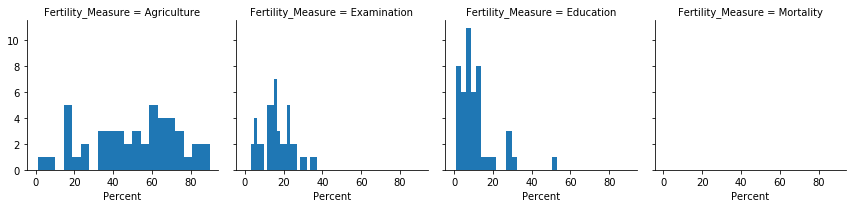

In [120]:
grid = sns.FacetGrid(df_melted, col="Fertility_Measure", margin_titles=True)
grid.map(plt.hist, "Percent", bins=20);

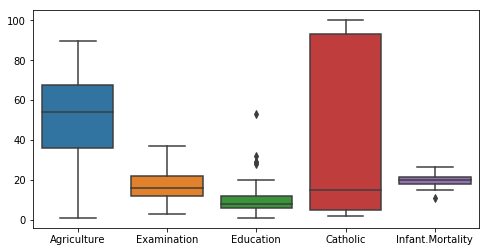

In [122]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['Fertility']))

In [124]:
# test_train_split
X = df.drop(['Fertility'], axis=1)
print(X.head())

y = df[['Fertility']]
print(y.head())

              Agriculture  Examination  Education  Catholic  Infant.Mortality
Courtelary           17.0           15         12      9.96              22.2
Delemont             45.1            6          9     84.84              22.2
Franches-Mnt         39.7            5          5     93.40              20.2
Moutier              36.5           12          7     33.77              20.3
Neuveville           43.5           17         15      5.16              20.6
              Fertility
Courtelary         80.2
Delemont           83.1
Franches-Mnt       92.5
Moutier            85.8
Neuveville         76.9


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.70, random_state=123)

In [126]:
train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality', 'Fertility']
Train dimensions (rows, columns): (32, 6)


In [127]:
test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality', 'Fertility']
Test dimensions (rows, columns): (15, 6)


In [128]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.68
Test Split: 0.32


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


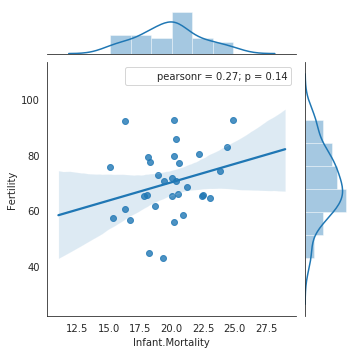

In [190]:
with sns.axes_style('white'):
    j = sns.jointplot("Infant.Mortality", "Fertility", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

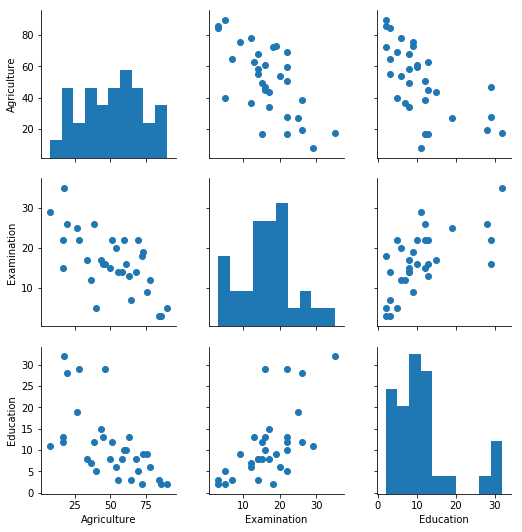

In [154]:
g = sns.PairGrid(train, vars=['Agriculture', 'Examination', 'Education'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

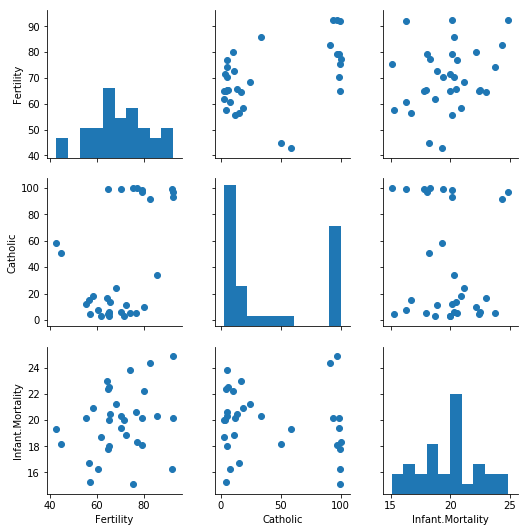

In [155]:
g = sns.PairGrid(train, vars=['Fertility', 'Catholic', 'Infant.Mortality'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

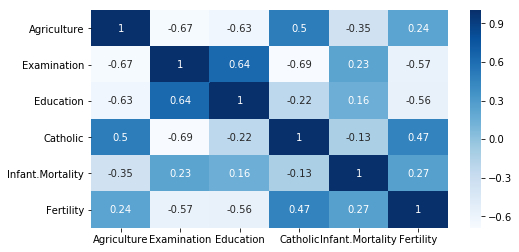

In [131]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [132]:
[[column, pearsonr(train[column], train.Fertility)] for column in X_train] 

[['Agriculture', (0.2373190547336189, 0.19092617184732316)],
 ['Examination', (-0.5678520313497669, 0.0006990666269751858)],
 ['Education', (-0.559642217271988, 0.0008675042713167025)],
 ['Catholic', (0.46548460095069305, 0.007259251436065238)],
 ['Infant.Mortality', (0.26508624969535294, 0.14257419612741745)]]

In [133]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     344.2
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.48e-23
Time:                        09:49:43   Log-Likelihood:                -115.05
No. Observations:                  32   AIC:                             240.1
Df Residuals:                      27   BIC:                             247.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Agriculture          0.0151      0.092      0.164      0.871      -0.174       0.204
Examination          0.0525      0.416      0.126      0.900      -0.801       0.906
Education           -0.7758      0.323     -2.403      0.023      -1.438      -0.113
Catholic             0.1471      0.065      2.268      0.032       0.014       0.280
Infant.Mortality     3.5519      0.423      8.398      0.000       2.684       4.420
==============================================================================
Omnibus:                        1.672   Durbin-Watson:                   2.522
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.168
Skew:                           0.193   Prob(JB):                        0.558
Kurtosis:                       2.147   Cond. No.                         26.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Linear Model 1**

In [134]:
lm1 = LinearRegression(normalize=True, fit_intercept=False)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)


In [135]:
lm1.fit(X_train[['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)
0.0


In [136]:
y_pred_lm1 = lm1.predict(X_train)

In [137]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

lm1
  mse: 77.7


Text(0.5, 1.0, 'Predicted vs Actual Fertility')

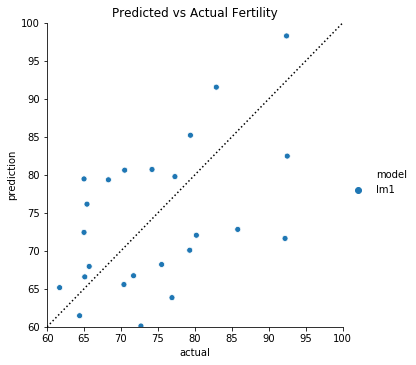

In [138]:
pd.DataFrame({'actual': y_train.Fertility,
              'lm1': y_pred_lm1.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Fertility')

In [139]:
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in fertility can be explained by all features in X_train.'.format(r2_lm1))

  47.56% of the variance in fertility can be explained by all features in X_train.


In [140]:
y_pred_lm1 = lm1.predict(X_test)

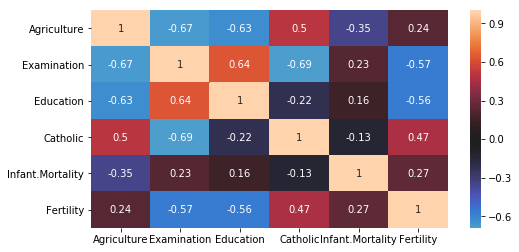

In [189]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), center=0, annot=True)

In [141]:
mse = mean_squared_error(y_test, y_pred_lm1)

print("Mean squared error: %.2f" % mse)

Mean squared error: 158.30


Text(0, 0.5, 'Residuals')

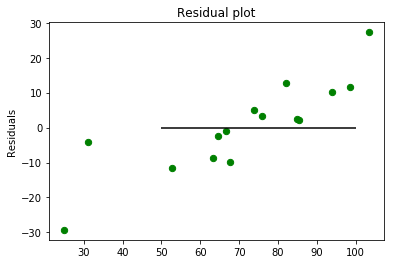

In [142]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

**Linear Model 2**

In [175]:
lm2 = LinearRegression(normalize=True)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [176]:
lm2.fit(X_train[['Education', 'Infant.Mortality']], y_train)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [177]:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

[44.56755594]
[[-0.92718055  1.79212266]]


In [178]:
y_pred_lm2 = lm2.predict(X_train.drop(columns=['Agriculture', 'Examination', 'Catholic']))

In [179]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2)) 

lm2
  mse: 82.9


Text(0.5, 1.0, 'Predicted vs Actual Fertility')

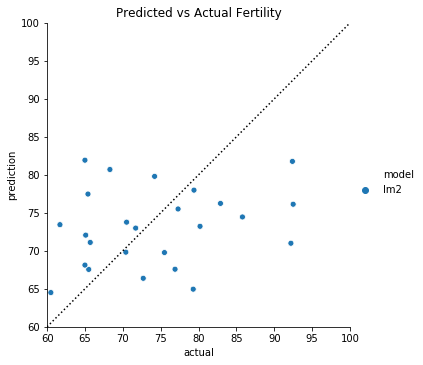

In [180]:
pd.DataFrame({'actual': y_train.Fertility,
              'lm2': y_pred_lm2.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Fertility')

In [181]:
r2_lm1 = r2_score(y_train, y_pred_lm2)

print('  {:.2%} of the variance in fertility can be explained by all features in X_train.'.format(r2_lm1))

  44.04% of the variance in fertility can be explained by all features in X_train.


In [182]:
y_pred_lm1 = lm1.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lm1)

print("Mean squared error: %.2f" % mse)

Mean squared error: 158.30


In [187]:
list(zip(train.drop(columns='Fertility').columns, lm1.coef_))

[('Agriculture',
  array([ 0.01509753,  0.05249992, -0.77582315,  0.14707115,  3.55189659]))]

Text(0, 0.5, 'Residuals')

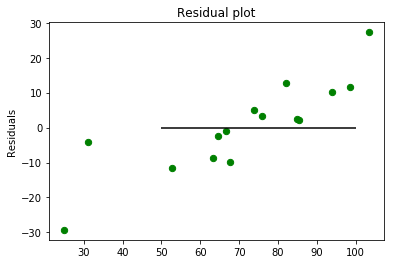

In [183]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

# Conclusion

Model 1 is the winner!

We fit a model based on all features except for Fertility with the dependent variable being Fertility